In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
class rosenblatt(object):
    def __init__ (self, n_inputs=2, n_outputs=1):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.w_matrix = np.ones((self.n_inputs+1, self.n_outputs))
        
    def push(self, X, Sum=False):
        X = np.matrix(X)
        assert X.shape[1] == self.n_inputs
        X = np.c_[X,np.ones((X.shape[0],1))]
        if Sum:
            return rosenblatt.f(X.dot(self.w_matrix).sum(axis=1))
        else:
            return rosenblatt.f(X.dot(self.w_matrix))
    
    def update(self, X, y, a = 0.1, i=10, verbose=False):
        X,y = np.matrix(X), np.matrix(y)
        assert X.shape[0] == y.shape[0]
        if verbose:
            print self.w_matrix 
        for n in range(i):
            r = np.random.randint(X.shape[0])
            o = self.push(X[r])
            change = a*np.c_[X[r],1].T*(y[r] - o)
            self.w_matrix += change
        if verbose:
            print '->\n',self.w_matrix

        
        
    @staticmethod
    def f(net):
        return (net>=0) * 2.0 - 1
    
    def lineeq(self, verbose=False):
        k = np.zeros(self.n_outputs)
        b = np.zeros(self.n_outputs)
        for i in range(self.n_outputs):
            k[i] = self.w_matrix[0,i]/-self.w_matrix[1,i]
            b[i] = self.w_matrix[2,i]/-self.w_matrix[1,i]
            if verbose:
                print 'y = {:4.2f}x {:+4.2f}'.format(k[i],b[i])
        return k, b
        
    def vis(self, X, y):
        numc = 2**self.n_outputs
        xs = np.linspace(-10,10,200)                 
        fig, ax = plt.subplots(1, figsize=(4,4))
        ax.scatter(X[:,0], X[:,1], c = arr2bin(y), cmap='Accent', s=100)
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        k, b = self.lineeq()
        for i in range(self.n_outputs):
            ax.plot(xs, k[i]*xs+b[i] )
            
def error(X, w_matrix):
    X = np.matrix(X)
    net = X.dot(w_matrix)
    o = f(net)
    err = o - Y
    return err

def arr2bin(Ys):
    Ys = (Ys + 1)/2
    ttl = []
    for y in Ys:
        out = 0
        pos = 1
        for i in np.ravel(y)[::-1]:
            out += i*pos
            pos *= 2
        ttl.append(out)
    return ttl

xs = np.linspace(-10,10,200)

In [64]:
X = np.matrix(((-0.6, -4.7, 2.1, -1.7, -1.8, 0.4, 0.5, -2.6) ,(4, 0.3, -3.3, -3.2, -1, -4.6, -2.3, -2.6))).T
Y = (np.matrix(((1, 1, 0, 0, 0, 0, 0, 0),(1, 1, 0, 0, 1, 0, 0, 0))).T-0.5)*2

# X = np.matrix(((-3.8, -0.2), (0.4, 3.9))).T
# y = np.matrix((1, -1)).T

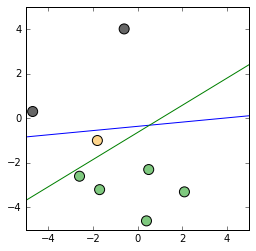

In [69]:
a = rosenblatt(n_outputs=2)
a.update(X,Y,a=0.3, i=100)
a.vis(X,Y)

In [70]:
# import time
# from IPython import display

# a = rosenblatt()
# for i in range(15):
#     a.update(X2, y2[:,0], a = 0.005, i = 10)
#     a.vis(X2, y2[:,0])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     time.sleep(0.01)
# a.update(X2, y2[:,0], a = 0.3, i = 1)
# a.vis(X2, y2[:,0])